Group : Adios Romain\
Num : 2187

Students :
- Nelson VICEL--FARAH
- Karen KASPAR
- Antoine ZELLMEYER

### Exploration



We create a SparkSession class using the builder method. In order to hide all Python level warnings we call the simplefilter method.

In [534]:
from pyspark.sql import SparkSession
spark_application_name = "Spark_Application_Name"
spark = (SparkSession.builder.appName(spark_application_name).getOrCreate())

import warnings
warnings.simplefilter("ignore")

In order to read the files, build the dataframes and set-up the correct columns types we create a generic read_dataframes function that takes the path to the directory containing the csv files of the stocks, we then create a schema with the correct types, before creating a dictionary with the company name (here the file name) as the key and the dataframe as value.

In [535]:
import glob
from pyspark.sql.types import *

def read_dataframes(path):
    schema = StructType([StructField("Date",TimestampType()),
                         StructField("High",FloatType()),
                         StructField("Low",FloatType()),
                         StructField("Open",FloatType()),
                         StructField("Close",FloatType()),
                         StructField("Volume",FloatType()),
                         StructField("Adj Close",FloatType()),
                         StructField("company_name",StringType())])
    all_dfs = { file.split("/")[1][:-4] : spark.read.schema(schema).csv(file, header=True) for file in glob.glob(path+"*.csv")}
    return all_dfs

In [536]:
read_dataframes("stocks_data/")

{'GOOGLE': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'FACEBOOK': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'AMAZON': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'APPLE': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'TESLA': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'MICROSOFT': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'ZOOM': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, 

We display the first and last 40 rows of each dataframe.

In [537]:
from pyspark.sql.functions import desc

def getForty(dataframes):
    for k, v in dataframes.items():
        v.show(40)
        v.orderBy(desc("Date")).show(40)

In [538]:
stocks = read_dataframes("stocks_data/")
getForty(stocks)

+-------------------+-------+-------+------+-------+---------+---------+------------+
|               Date|   High|    Low|  Open|  Close|   Volume|Adj Close|company_name|
+-------------------+-------+-------+------+-------+---------+---------+------------+
|2017-01-03 00:00:00| 789.63|  775.8|778.81| 786.14|1657300.0|   786.14|      GOOGLE|
|2017-01-04 00:00:00| 791.34| 783.16|788.36|  786.9|1073000.0|    786.9|      GOOGLE|
|2017-01-05 00:00:00| 794.48| 785.02|786.08| 794.02|1335200.0|   794.02|      GOOGLE|
|2017-01-06 00:00:00|  807.9|792.204|795.26| 806.15|1640200.0|   806.15|      GOOGLE|
|2017-01-09 00:00:00|809.966| 802.83| 806.4| 806.65|1274600.0|   806.65|      GOOGLE|
|2017-01-10 00:00:00| 809.13| 803.51|807.86| 804.79|1176800.0|   804.79|      GOOGLE|
|2017-01-11 00:00:00| 808.15| 801.37| 805.0| 807.91|1065900.0|   807.91|      GOOGLE|
|2017-01-12 00:00:00| 807.39| 799.17|807.14| 806.36|1353100.0|   806.36|      GOOGLE|
|2017-01-13 00:00:00|811.224| 806.69|807.48| 807.88|10

+-------------------+-------+-------+-------+---------+---------+---------+------------+
|               Date|   High|    Low|   Open|    Close|   Volume|Adj Close|company_name|
+-------------------+-------+-------+-------+---------+---------+---------+------------+
|2020-12-02 00:00:00|3223.76|3173.26|3221.65|3213.4385|1119593.0|3213.4385|      AMAZON|
|2020-12-01 00:00:00|3248.95|3157.18| 3188.5|  3220.08|4537000.0|  3220.08|      AMAZON|
|2020-11-30 00:00:00|3228.39|3125.55|3208.48|  3168.04|4063900.0|  3168.04|      AMAZON|
|2020-11-27 00:00:00|3216.19|3190.05|3211.26|  3195.34|2392900.0|  3195.34|      AMAZON|
|2020-11-25 00:00:00| 3198.0|3140.26|3141.87|  3185.07|3790400.0|  3185.07|      AMAZON|
|2020-11-24 00:00:00|3134.25|3086.26| 3100.5|  3118.06|3602100.0|  3118.06|      AMAZON|
|2020-11-23 00:00:00|3139.75|3065.46| 3116.7|  3098.39|4708900.0|  3098.39|      AMAZON|
|2020-11-20 00:00:00|3132.89|3098.05|3117.02|   3099.4|3374400.0|   3099.4|      AMAZON|
|2020-11-19 00:00:00|

+-------------------+-----+-----+-----+-----+---------+---------+------------+
|               Date| High|  Low| Open|Close|   Volume|Adj Close|company_name|
+-------------------+-----+-----+-----+-----+---------+---------+------------+
|2017-01-03 00:00:00|62.84|62.13|62.79|62.58|2.06941E7|58.673244|   MICROSOFT|
|2017-01-04 00:00:00|62.75|62.12|62.48| 62.3|  2.134E7|58.410725|   MICROSOFT|
|2017-01-05 00:00:00|62.66|62.03|62.19| 62.3| 2.4876E7|58.410725|   MICROSOFT|
|2017-01-06 00:00:00|63.15|62.04| 62.3|62.84|1.99229E7|58.917015|   MICROSOFT|
|2017-01-09 00:00:00|63.08|62.54|62.76|62.64|2.03827E7|58.729496|   MICROSOFT|
|2017-01-10 00:00:00|63.07|62.28|62.73|62.62| 1.8593E7|58.710747|   MICROSOFT|
|2017-01-11 00:00:00|63.23|62.43|62.61|63.19|2.15173E7| 59.24516|   MICROSOFT|
|2017-01-12 00:00:00| 63.4|61.95|63.06|62.61|2.09682E7| 58.70137|   MICROSOFT|
|2017-01-13 00:00:00|62.87|62.35|62.62| 62.7|1.94223E7|58.785755|   MICROSOFT|
|2017-01-17 00:00:00| 62.7|62.03|62.68|62.53| 2.0664

We create a function that gets the number of observations (rows) of each dataframe and displays them

In [539]:
def nbrObservations(dataframes):
    for k, v in dataframes.items():
        print(k, "has", v.count(), "rows")

In [540]:
nbrObservations(stocks)

GOOGLE has 987 rows
FACEBOOK has 987 rows
AMAZON has 987 rows
APPLE has 987 rows
TESLA has 987 rows
MICROSOFT has 987 rows
ZOOM has 411 rows


We create a function that takes a dataframe that includes two datapoints (two rows of any stock dataframe) and adds a column diff that contains the difference in number of days between the dates of the datapoints.

In [541]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

def period_between(dataframe):
    w = Window.partitionBy().orderBy("Date")
    dataframe = dataframe.withColumn("prev_value", F.lag(dataframe.Date).over(w))
    dataframe = dataframe.withColumn("prev_value", F.when(F.isnull(dataframe.prev_value), F.lead(dataframe.Date).over(w)).otherwise(F.lag(dataframe.Date).over(w)))
    dataframe = dataframe.withColumn("diff", datediff(dataframe.Date,dataframe.prev_value))
    dataframe.show()

In order to test the function, we select two random dataframes from the dictionary and pick a random row from each before calling the period_between on the dataframe comprised of the two rows.

In [542]:
import random
dataframe = random.choice(list(stocks.values()))
d1 = dataframe.orderBy(rand()).limit(1)
dataframe = random.choice(list(stocks.values()))
d2 = dataframe.orderBy(rand()).limit(1)
d1.show()
d2.show()
dataframe = d1.union(d2)
dataframe.show()
period_between(dataframe)

+-------------------+----+-----+----+-----+---------+---------+------------+
|               Date|High|  Low|Open|Close|   Volume|Adj Close|company_name|
+-------------------+----+-----+----+-----+---------+---------+------------+
|2019-12-04 00:00:00|70.9|69.15|70.5|69.96|2076500.0|    69.96|        ZOOM|
+-------------------+----+-----+----+-----+---------+---------+------------+

+-------------------+----+-----+------+------+--------+---------+------------+
|               Date|High|  Low|  Open| Close|  Volume|Adj Close|company_name|
+-------------------+----+-----+------+------+--------+---------+------------+
|2019-11-26 00:00:00|67.1|65.42|67.054|65.784|3.9737E7|   65.784|       TESLA|
+-------------------+----+-----+------+------+--------+---------+------------+

+-------------------+----+-----+------+------+---------+---------+------------+
|               Date|High|  Low|  Open| Close|   Volume|Adj Close|company_name|
+-------------------+----+-----+------+------+---------+--

22/05/22 20:39:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


We create a function that displays all the relevant descriptive statistics (including min, max and standrad deviation) of all the dataframes.

In [543]:
def statistics(dataframes):
    for k, v in dataframes.items():
        v.describe().show()

In [544]:
statistics(stocks)

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------+
|summary|              High|               Low|              Open|             Close|            Volume|         Adj Close|company_name|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------+
|  count|               987|               987|               987|               987|               987|               987|         987|
|   mean|1175.6790605137292|1152.9178970166856|1163.8854444324065|1164.8144006854736|1634631.7335359675|1164.8144006854736|        null|
| stddev| 218.8235632110295| 212.2207173542823|214.97779187990264|215.44599608390612| 716425.6760312195|215.44599608390612|        null|
|    min|            789.63|             775.8|            778.81|            786.14|          285821.0|            786.14|      GOOGLE|
|    max|           1824.83|         1789

We create a function missing_values that displays all missing values in all the columns of all the dataframes in the dictionary.

In [545]:
from pyspark.sql import functions as F

def missing_values(dataframes):
    for k, v in dataframes.items():
        print(k)
        v.select(*[(F.count(F.when((F.isnan(c) | F.col(c).isNull()), c)) if t not in ("timestamp", "date")
        else F.count(F.when(F.col(c).isNull(), c))).alias(c) for c, t in v.dtypes if c in v.columns]).show()

In [546]:
missing_values(stocks)

GOOGLE
+----+----+---+----+-----+------+---------+------------+
|Date|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+----+---+----+-----+------+---------+------------+
|   0|   0|  0|   0|    0|     0|        0|           0|
+----+----+---+----+-----+------+---------+------------+

FACEBOOK
+----+----+---+----+-----+------+---------+------------+
|Date|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+----+---+----+-----+------+---------+------------+
|   0|   0|  0|   0|    0|     0|        0|           0|
+----+----+---+----+-----+------+---------+------------+

AMAZON
+----+----+---+----+-----+------+---------+------------+
|Date|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+----+---+----+-----+------+---------+------------+
|   0|   0|  0|   0|    0|     0|        0|           0|
+----+----+---+----+-----+------+---------+------------+

APPLE
+----+----+---+----+-----+------+---------+------------+
|Date|High|Low|Open|Close|Volume|Adj Close|company_name|

We create a function that displays the correlation matrix (the correlation between the values of all columns except the date and company column as they are of type timestamp and string and the correlation cannot be computed for those types) of all the different stocks.

In [547]:
from pyspark.sql.functions import *
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

def values_correlation(dataframes):
    for k, v in dataframes.items():
        vector_col = "corr_features"
        cols = [c for c, t in v.dtypes if c in v.columns if t not in ("timestamp", "date", "string")]
        assembler = VectorAssembler(inputCols=cols, outputCol=vector_col)
        df_vector = assembler.transform(v).select(vector_col)
        matrix = Correlation.corr(df_vector, vector_col)
        print(k)
        print(matrix.collect()[0]["pearson({})".format(vector_col)].values)

In [548]:
values_correlation(stocks)

GOOGLE
[1.         0.99797685 0.99876601 0.99852863 0.07899549 0.99852863
 0.99797685 1.         0.99839345 0.99871947 0.03681076 0.99871947
 0.99876601 0.99839345 1.         0.99717218 0.06258244 0.99717218
 0.99852863 0.99871947 0.99717218 1.         0.05524262 1.
 0.07899549 0.03681076 0.06258244 0.05524262 1.         0.05524262
 0.99852863 0.99871947 0.99717218 1.         0.05524262 1.        ]
FACEBOOK
[ 1.          0.99763976  0.99842827  0.99829194 -0.00189788  0.99829194
  0.99763976  1.          0.99818802  0.99841692 -0.04461639  0.99841692
  0.99842827  0.99818802  1.          0.99668953 -0.02146639  0.99668953
  0.99829194  0.99841692  0.99668953  1.         -0.0235399   1.
 -0.00189788 -0.04461639 -0.02146639 -0.0235399   1.         -0.0235399
  0.99829194  0.99841692  0.99668953  1.         -0.0235399   1.        ]
AMAZON
[1.         0.99919608 0.99952481 0.99943308 0.16053643 0.99943308
 0.99919608 1.         0.99934439 0.99947694 0.13293678 0.99947694
 0.99952481 0.9993

We first create a function that adds the time period by including the week, month and year of each row in the dataframes. We then create functions that compute the average opening and closing price for each stock and for different time periods (week, month, year).

In [564]:
from pyspark.sql.functions import mean as _mean, col

def add_period(dataframes):
    for k, v in dataframes.items():
        v = v.withColumn('week_of_year', weekofyear(v.Date))
        v = v.withColumn('month', month(v.Date))
        v = v.withColumn('year', year(v.Date))
        dataframes[k] = v
    return dataframes


def get_weekly_mean(week, year, dataframe, close_open_price):
    return dataframe.filter((col("week_of_year") == week) & (col("year") == year)).select(sum(close_open_price)).collect()[0][0]
        
def get_monthly_mean(month, year, dataframe, close_open_price):
    return dataframe.filter((col("month") == month) & (col("year") == year)).select(sum(close_open_price)).collect()[0][0]
    
def get_yearly_mean(year, dataframe, close_open_price):
    return dataframe.filter(col("year") == year).select(sum(close_open_price)).collect()[0][0]

In [565]:
add_period(stocks)
for k, v in stocks.items():
    print('The average open price for the stock', k, 'for the fifth week of 2017 is', get_weekly_mean(5, 2017, v, 'Open'))

The average open price for the stock GOOGLE for the fifth week of 2017 is 4007.9899291992188
The average open price for the stock FACEBOOK for the fifth week of 2017 is 658.4600067138672
The average open price for the stock AMAZON for the fifth week of 2017 is 4129.27001953125
The average open price for the stock APPLE for the fifth week of 2017 is 156.35000038146973
The average open price for the stock TESLA for the fifth week of 2017 is 251.01399993896484
The average open price for the stock MICROSOFT for the fifth week of 2017 is 321.6600036621094
The average open price for the stock ZOOM for the fifth week of 2017 is None


We add a column that indicates the differences between the current opening price and the opening price of the day before.

In [551]:
def day_to_day_change(dataframes):
    for k, v in dataframes.items():
        w = Window.partitionBy().orderBy("Date")
        v = v.withColumn("day_to_day_change", 
                                         F.when(F.isnull(F.lag(v.Open).over(w)), 0).otherwise(v.Open - F.lag(v.Open).over(w)))
        v.show()

day_to_day_change(stocks)

22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------------------+-------+-------+------+-------+---------+---------+------------+------------+-----+----+-----------------+
|               Date|   High|    Low|  Open|  Close|   Volume|Adj Close|company_name|week_of_year|month|year|day_to_day_change|
+-------------------+-------+-------+------+-------+---------+---------+------------+------------+-----+----+-----------------+
|2017-01-03 00:00:00| 789.63|  775.8|778.81| 786.14|1657300.0|   786.14|      GOOGLE|           1|    1|2017|              0.0|
|2017-01-04 00:00:00| 791.34| 783.16|788.36|  786.9|1073000.0|    786.9|      GOOGLE|           1|    1|2017|         9.549988|
|2017-01-05 00:00:00| 794.48| 785.02|786.08| 794.02|1335200.0|   794.02|      GOOGLE|           1|    1|2017|       -2.2799683|
|2017-01-06 00:00:00|  807.9|792.204|795.26| 806.15|1640200.0|   806.15|      GOOGLE|           1|    1|2017|         9.179993|
|2017-01-09 00:00:00|809.966| 802.83| 806.4| 806.65|1274600.0|   806.65|      GOOGLE|           2|    1|

22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------------------+-------+-------+-------+-------+----------+---------+------------+------------+-----+----+-----------------+
|               Date|   High|    Low|   Open|  Close|    Volume|Adj Close|company_name|week_of_year|month|year|day_to_day_change|
+-------------------+-------+-------+-------+-------+----------+---------+------------+------------+-----+----+-----------------+
|2017-01-03 00:00:00|29.0825|  28.69|  28.95|29.0375|1.151276E8| 27.27764|       APPLE|           1|    1|2017|              0.0|
|2017-01-04 00:00:00|29.1275|28.9375|28.9625| 29.005| 8.44724E7|27.247108|       APPLE|           1|    1|2017|      0.012498856|
|2017-01-05 00:00:00| 29.215|28.9525|  28.98|29.1525| 8.87744E7|27.385668|       APPLE|           1|    1|2017|      0.017499924|
|2017-01-06 00:00:00|  29.54|29.1175| 29.195|29.4775|1.270076E8|27.690971|       APPLE|           1|    1|2017|       0.21500015|
|2017-01-09 00:00:00|29.8575| 29.485|29.4875|29.7475|1.342476E8|27.944603|       APPLE|   

22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 2

+-------------------+------+------+-----+-----+---------+---------+------------+------------+-----+----+-----------------+
|               Date|  High|   Low| Open|Close|   Volume|Adj Close|company_name|week_of_year|month|year|day_to_day_change|
+-------------------+------+------+-----+-----+---------+---------+------------+------------+-----+----+-----------------+
|2019-04-18 00:00:00|  66.0|60.321| 65.0| 62.0|2.57647E7|     62.0|        ZOOM|          16|    4|2019|              0.0|
|2019-04-22 00:00:00|  68.9| 59.94| 61.0| 65.7|9949700.0|     65.7|        ZOOM|          17|    4|2019|             -4.0|
|2019-04-23 00:00:00|74.169| 65.55|66.87| 69.0|6786500.0|     69.0|        ZOOM|          17|    4|2019|        5.8700027|
|2019-04-24 00:00:00|  71.5| 63.16| 71.4| 63.2|4973500.0|     63.2|        ZOOM|          17|    4|2019|         4.529999|
|2019-04-25 00:00:00| 66.85|  62.6|64.74| 65.0|3863300.0|     65.0|        ZOOM|          17|    4|2019|       -6.6600037|
|2019-04-26 00:0

22/05/22 20:39:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


We add a column 'daily_return' that contains the differences between the close and open price and indicates the daily return of each stock.

In [552]:
def daily_return(dataframes):
    for k, v in dataframes.items():
        print(k)
        v = v.withColumn('daily_return', col("Close") - col("Open"))
        v.show()
        dataframes[k] = v
    return dataframes
    
stocks = daily_return(stocks)

GOOGLE
+-------------------+-------+-------+------+-------+---------+---------+------------+------------+-----+----+------------+
|               Date|   High|    Low|  Open|  Close|   Volume|Adj Close|company_name|week_of_year|month|year|daily_return|
+-------------------+-------+-------+------+-------+---------+---------+------------+------------+-----+----+------------+
|2017-01-03 00:00:00| 789.63|  775.8|778.81| 786.14|1657300.0|   786.14|      GOOGLE|           1|    1|2017|    7.330017|
|2017-01-04 00:00:00| 791.34| 783.16|788.36|  786.9|1073000.0|    786.9|      GOOGLE|           1|    1|2017|  -1.4599609|
|2017-01-05 00:00:00| 794.48| 785.02|786.08| 794.02|1335200.0|   794.02|      GOOGLE|           1|    1|2017|   7.9400024|
|2017-01-06 00:00:00|  807.9|792.204|795.26| 806.15|1640200.0|   806.15|      GOOGLE|           1|    1|2017|   10.890015|
|2017-01-09 00:00:00|809.966| 802.83| 806.4| 806.65|1274600.0|   806.65|      GOOGLE|           2|    1|2017|        0.25|
|2017-01-

+-------------------+------+------+------+------+---------+---------+------------+------------+-----+----+------------+
|               Date|  High|   Low|  Open| Close|   Volume|Adj Close|company_name|week_of_year|month|year|daily_return|
+-------------------+------+------+------+------+---------+---------+------------+------------+-----+----+------------+
|2017-01-03 00:00:00|44.066|42.192|42.972|43.398|2.96165E7|   43.398|       TESLA|           1|    1|2017|   0.4259987|
|2017-01-04 00:00:00|  45.6|42.862| 42.95|45.398|5.60675E7|   45.398|       TESLA|           1|    1|2017|    2.447998|
|2017-01-05 00:00:00|45.496| 44.39|45.284| 45.35|2.95585E7|    45.35|       TESLA|           1|    1|2017|  0.06599808|
|2017-01-06 00:00:00|46.062| 45.09|45.386|45.802|2.76395E7|   45.802|       TESLA|           1|    1|2017|  0.41599655|
|2017-01-09 00:00:00|46.384|  45.6|45.794|46.256|1.98975E7|   46.256|       TESLA|           2|    1|2017|   0.4620018|
|2017-01-10 00:00:00|  46.4|45.378|  46.

We create a function that returns the stock with the maximum daily return

In [553]:
import builtins

def get_max_daily_return(df):
    return df.agg({"daily_return": "max"}).collect()[0][0]

def max_daily_return(dataframes):
    temp_dict = {k: get_max_daily_return(v) for k, v in dataframes.items()}
    return builtins.max(temp_dict, key=temp_dict.get)
        
print(max_daily_return(stocks))

AMAZON


In order to calculate the average daily return for different periods (week, month and year) we create three functinos (one for weekly periods, one for monthly and a last one for yearly periods) that returns the mean of the daily return shared by the values belonging to this period.

In [554]:
def average_daily_return_by_week(week, year, dataframe):
    return dataframe.filter((col("week_of_year") == week) & (col("year") == year)).select(sum("daily_return")).collect()[0][0]
    
def average_daily_return_by_month(month, year, dataframe):
    return dataframe.filter((col("month") == month) & (col("year") == year)).select(sum("daily_return")).collect()[0][0]
    
def average_daily_return_by_year(year, dataframe):
    return dataframe.filter(col("year") == year).select(sum("daily_return")).collect()[0][0]
    
for k, v in stocks.items():
    print("The average daily return for the stock", k, 
          "for the third week of 2020 is", average_daily_return_by_week(3, 2020, v))

The average daily return for the stock GOOGLE for the third week of 2020 is 25.699951171875
The average daily return for the stock FACEBOOK for the third week of 2020 is -0.3900146484375
The average daily return for the stock AMAZON for the third week of 2020 is -52.900146484375
The average daily return for the stock APPLE for the third week of 2020 is 1.2249908447265625
The average daily return for the stock TESLA for the third week of 2020 is 7.277992248535156
The average daily return for the stock MICROSOFT for the third week of 2020 is 2.32000732421875
The average daily return for the stock ZOOM for the third week of 2020 is -0.34999847412109375


### Moving Average

We calculate the moving average by computing the mean of the value of the column over the last n rows

In [555]:
from pyspark.sql import Window
from pyspark.sql.functions import avg


def moving_average(df, column, n):        
    w = Window.orderBy(df.Date)
    df_with_rsum = df.withColumn("Moving Average", avg(col(column)).over(w.rowsBetween(-n, 0)))
    return df_with_rsum
        
moving_average(stocks["GOOGLE"], "Open", 5).show()

+-------------------+-------+-------+------+-------+---------+---------+------------+------------+-----+----+------------+-----------------+
|               Date|   High|    Low|  Open|  Close|   Volume|Adj Close|company_name|week_of_year|month|year|daily_return|   Moving Average|
+-------------------+-------+-------+------+-------+---------+---------+------------+------------+-----+----+------------+-----------------+
|2017-01-03 00:00:00| 789.63|  775.8|778.81| 786.14|1657300.0|   786.14|      GOOGLE|           1|    1|2017|    7.330017|778.8099975585938|
|2017-01-04 00:00:00| 791.34| 783.16|788.36|  786.9|1073000.0|    786.9|      GOOGLE|           1|    1|2017|  -1.4599609|783.5849914550781|
|2017-01-05 00:00:00| 794.48| 785.02|786.08| 794.02|1335200.0|   794.02|      GOOGLE|           1|    1|2017|   7.9400024|784.4166666666666|
|2017-01-06 00:00:00|  807.9|792.204|795.26| 806.15|1640200.0|   806.15|      GOOGLE|           1|    1|2017|   10.890015|787.1275024414062|
|2017-01-09 0

22/05/22 20:39:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 20:39:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In order to get the correlatino between the stocks, 

In [556]:
from pyspark.sql.functions import *

cols = ["High","Low","Open","Close","Volume","Adj Close"]
cols2 = list(map(lambda x:x+"_2", cols))

def stock_correlation(stock1, stock2):
    for k,e in enumerate(cols):
        stock2 = stock2.withColumnRenamed(e, cols2[k])
        stock2 = stock2.withColumn(e, lit(None))
        stock1 = stock1.withColumn(cols2[k], lit(None))
    
    df_concat = stock1.unionByName(stock2)
    for k,e in enumerate(cols):
        print(e, " : ", df_concat.stat.corr(e, cols2[k]))

In [557]:
stock_correlation(stocks['GOOGLE'], stocks['AMAZON'])

High  :  -0.8526312326160781
Low  :  -0.8553684258303108
Open  :  -0.8539389465485948
Close  :  -0.854144691538871
Volume  :  -0.7019075169249985
Adj Close  :  -0.854144691538871


In order to get the return rate over a period, we create three functions for the weekly, monthly and yearly period, eahc one computing the return rate (first opening price minus last opening price over the initial price multiplied by 100).

In [558]:
# (prix final - prix initial) / prix initial * 100

def return_rate_by_week(week, year, dataframe):
    current = dataframe.filter((col("week_of_year") == week) & (col("year") == year)).sort('Date')
    if (current.rdd.isEmpty()):
        return
    initial_value = current.collect()[0]['Open']
    last_value = current.collect()[-1]['Open']
    return (last_value - initial_value)/initial_value * 100
    
    
def return_rate_by_month(month, year, dataframe):
    current = dataframe.filter((col("month") == month) & (col("year") == year)).sort('Date')
    if (current.rdd.isEmpty()):
        return
    initial_value = current.collect()[0]['Open']
    last_value = current.collect()[-1]['Open']
    return (last_value - initial_value)/initial_value * 100

def return_rate_by_year(year, dataframe):
    current = dataframe.filter((col("year") == year)).sort('Date')
    if (current.rdd.isEmpty()):
        return
    initial_value = current.collect()[0]['Open']
    last_value = current.collect()[-1]['Open']
    return (last_value - initial_value)/initial_value * 100


In [559]:
for k, v in stocks.items():
    print("The return rate for the stock", k, 
          "for the third week of 2020 is", return_rate_by_week(3, 2020, v))

The return rate for the stock GOOGLE for the third week of 2020 is 1.864735727672526
The return rate for the stock FACEBOOK for the third week of 2020 is 1.1065540110394139
The return rate for the stock AMAZON for the third week of 2020 is -0.28657617087610043
The return rate for the stock APPLE for the third week of 2020 is 1.4856803194729244
The return rate for the stock TESLA for the third week of 2020 is 2.8591755955836393
The return rate for the stock MICROSOFT for the third week of 2020 is 3.499013263053854
The return rate for the stock ZOOM for the third week of 2020 is 3.748821620438393


In [560]:
for k, v in stocks.items():
    print("The return rate for the stock", k, 
          "for the fourth month of 2020 is", return_rate_by_month(4, 2020, v))

The return rate for the stock GOOGLE for the fourth month of 2020 is 18.08199687012589
The return rate for the stock FACEBOOK for the fourth month of 2020 is 28.028712053178612
The return rate for the stock AMAZON for the fourth month of 2020 is 25.18767102265946
The return rate for the stock APPLE for the fourth month of 2020 is 17.63082817650228
The return rate for the stock TESLA for the fourth month of 2020 is 69.68054484774439
The return rate for the stock MICROSOFT for the fourth month of 2020 is 17.647058823529413
The return rate for the stock ZOOM for the fourth month of 2020 is -3.121103464938365


In [561]:
for k, v in stocks.items():
    print("The return rate for the stock", k, 
          "for the year 2020 is", return_rate_by_year(2020, v))

The return rate for the stock GOOGLE for the year 2020 is 34.03152399395158
The return rate for the stock FACEBOOK for the year 2020 is 38.021758332073766
The return rate for the stock AMAZON for the year 2020 is 71.821328125
The return rate for the stock APPLE for the year 2020 is 64.75830497635155
The return rate for the stock TESLA for the year 2020 is 555.406351520258
The return rate for the stock MICROSOFT for the year 2020 is 35.33190989722468
The return rate for the stock ZOOM for the year 2020 is 479.94183474066824


In order to get the return rate for a specific month, we 

In [562]:
def monthly_return_rate_by_month(start_date, month, year, dataframe):
    current = dataframe.filter((col('Date') > start_date) & (col("month") == month) & (col("year") == year)).sort('Date')
    if (current.rdd.isEmpty()):
        return
    initial_value = current.collect()[0]['Open']
    last_value = current.collect()[-1]['Open']
    return (last_value - initial_value)/initial_value * 100

In [617]:
def max_return_rate(start_date, month, year, dataframes):
    temp_dict = {k: monthly_return_rate_by_month(start_date, month, year, v) for k, v in dataframes.items()}
    return builtins.max(temp_dict, key=temp_dict.get)


print(max_return_rate('2019-04-18 00:00:00', 9, 2020, stocks))

ZOOM


# Insights

In [618]:
for i in range (1,10):
    print(max_return_rate('2017-01-01 00:00:00', i, 2020, stocks))

TESLA
ZOOM
ZOOM
TESLA
ZOOM
ZOOM
TESLA
TESLA
ZOOM


In 2020 inversting in Tesla and Zoom would be the most financially smart

In [619]:
def yearly_return_rate(year, dataframe):
    current = dataframe.filter((col("year") == year)).sort('Date')
    if (current.rdd.isEmpty()):
        return 0
    initial_value = current.collect()[0]['Open']
    last_value = current.collect()[-1]['Open']
    return (last_value - initial_value)/initial_value * 100

def max_return_rate_y(year, dataframes):
    temp_dict = {k: yearly_return_rate(year, v) for k, v in dataframes.items()}
    return temp_dict

In [620]:
year_list = {}
for i in range (2017, 2021):
    year_list[i] = max_return_rate_y(i, stocks)
print(year_list)

{2017: {'GOOGLE': 34.39991448291276, 'FACEBOOK': 53.4086028377692, 'AMAZON': 55.99931420809274, 'APPLE': 47.25388581919601, 'TESLA': 47.1562875393303, 'MICROSOFT': 36.375212621222495, 'ZOOM': 0}, 2018: {'GOOGLE': 0.24991846181666721, 'FACEBOOK': -24.330255239498076, 'AMAZON': 28.907853995573806, 'APPLE': -6.834746493016343, 'TESLA': 8.266020841695813, 'MICROSOFT': 17.601305173045002, 'ZOOM': 0}, 2019: {'GOOGLE': 30.842930223038262, 'FACEBOOK': 58.15178797772139, 'AMAZON': 25.716629906161153, 'APPLE': 87.18444949206821, 'TESLA': 32.309700073327924, 'MICROSOFT': 57.478653406925, 'ZOOM': 2.123072697566106}, 2020: {'GOOGLE': 34.03152399395158, 'FACEBOOK': 38.021758332073766, 'AMAZON': 71.821328125, 'APPLE': 64.75830497635155, 'TESLA': 555.406351520258, 'MICROSOFT': 35.33190989722468, 'ZOOM': 479.94183474066824}}


In [621]:
data = [[year_list[i][key] for i in range(2017, 2021)] for key in year_list[2017].keys()] 
print(data)

[[34.39991448291276, 0.24991846181666721, 30.842930223038262, 34.03152399395158], [53.4086028377692, -24.330255239498076, 58.15178797772139, 38.021758332073766], [55.99931420809274, 28.907853995573806, 25.716629906161153, 71.821328125], [47.25388581919601, -6.834746493016343, 87.18444949206821, 64.75830497635155], [47.1562875393303, 8.266020841695813, 32.309700073327924, 555.406351520258], [36.375212621222495, 17.601305173045002, 57.478653406925, 35.33190989722468], [0, 0, 2.123072697566106, 479.94183474066824]]


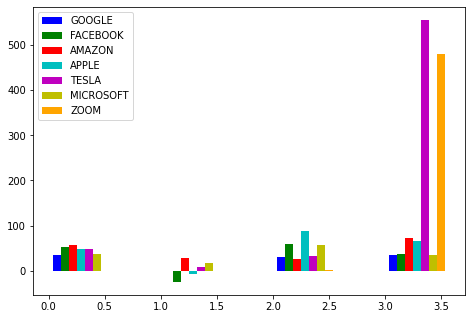

In [623]:
import matplotlib.pyplot as plt
import numpy as np

pretty_colors = ["b","g","r","c","m","y","orange"]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
step = 1/14
for company in range(7):
    ax.bar(X + (company+1)*step, data[company], width = step, color=pretty_colors[company])
ax.legend(labels=list(year_list[2017].keys()))

We notice that the return rate of a few companies explodes in 2020, including Tesla and Zoom that reach and go beyond the 500 mark.

We can also see a negative value for the return rate for the Facebook company in 2018 probably due to its investments in VR and following later its rebranding into meta and its involvement into the metaverse.

In [650]:
moving_list = []
for c in list(year_list[2017].keys()):
    moving_list.append(moving_average(stocks[c], "Open", 7))

In [653]:
moving_data = [[elem[0] for elem in e.select('Moving Average').sort('Date').collect()] for e in moving_list]
print(moving_data)

22/05/22 22:09:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 22:09:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 22:09:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 22:09:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 22:09:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 22:09:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 2

[[778.8099975585938, 783.5849914550781, 784.4166666666666, 787.1275024414062, 790.9820068359375, 793.7950032552084, 795.3957170758929, 796.8637542724609, 800.4475021362305, 802.7875061035156, 805.2537536621094, 806.4862518310547, 806.5499954223633, 806.473747253418, 808.6362457275391, 811.4462432861328, 815.2374954223633, 818.6912460327148, 819.797492980957, 818.7649917602539, 817.8612442016602, 816.1799926757812, 813.766242980957, 810.0262451171875, 805.7987442016602, 802.3349914550781, 801.6912460327148, 803.5462493896484, 805.5862503051758, 808.7362518310547, 810.7825012207031, 813.3112487792969, 815.6900024414062, 818.3974990844727, 820.7912445068359, 823.0937423706055, 824.5599899291992, 825.2537384033203, 826.0349884033203, 827.1499862670898, 828.5037307739258, 828.7412338256836, 828.5274887084961, 828.1874923706055, 828.9099960327148, 830.3412475585938, 832.5500030517578, 834.4437561035156, 835.6675109863281, 837.7962646484375, 840.556266784668, 843.5825119018555, 845.6450119018

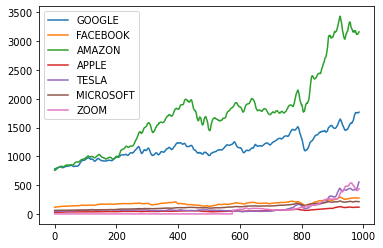

In [657]:
column = list(year_list[2017].keys())

for i in range(len(column)):
    if i == 6:
        plt.plot(np.arange(576 + len(moving_data[i])), [0]*576+moving_data[i], label=column[i])
    else:
        plt.plot(np.arange(len(moving_data[i])), moving_data[i], label=column[i])
plt.legend()
plt.show()

We chose a weekly moving average to analyse the data. We can notice a very important increase in the value of the Amazon stock price probably due to the effect of the covid-19 but we can also observe that Amazon hasn't made a spectacular increase in revenue in the same time period. With this graph we cannot see clearly the other stocks but a consequent increase for the newly born Zoom.

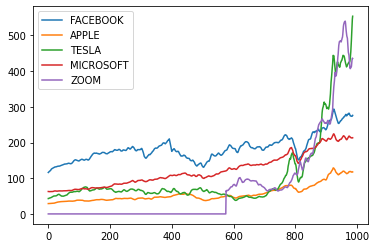

In [658]:
column = list(year_list[2017].keys())

for i in range(len(column)):
    if i == 0 or i == 2:
        continue
    if i == 6:
        plt.plot(np.arange(576 + len(moving_data[i])), [0]*576+moving_data[i], label=column[i])
    else:
        plt.plot(np.arange(len(moving_data[i])), moving_data[i], label=column[i])
plt.legend()
plt.show()

We observe better the increase of the Zoom stock that appeared on the market in 2019. Surprisingly we can  conclude that every company has made profit during the covid-19 period regardless of the size of it. One insight we can make is that we're today after the wave, Zoom is decreasing now and the Microsoft's increase is stagnant, and more generally every tech company has stoppped their increase due to the covid-19. We should have invested before the covid-19 event, at least for tech companies. 